# 240222 통계 기반 시계열 분석 (2)

In [4]:
# !git clone https://github.com/Im-JihyunKim/2024_LGE_TimeSeries # colab 사용 시

In [4]:
# !pip install IPython
from IPython.display import Image

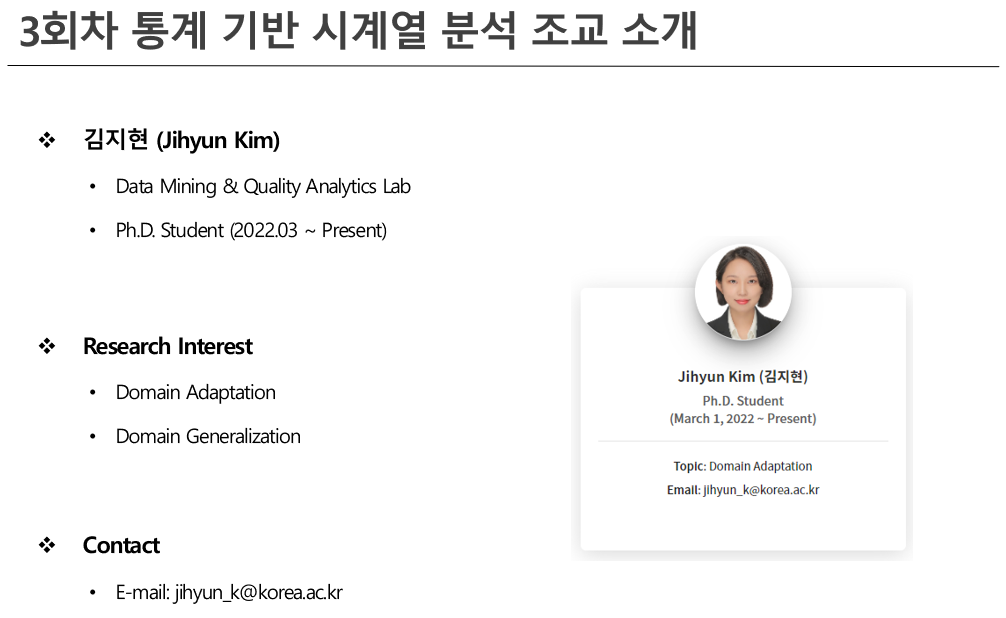

In [5]:
Image('image/img0.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/img0.PNG') # colab 사용시

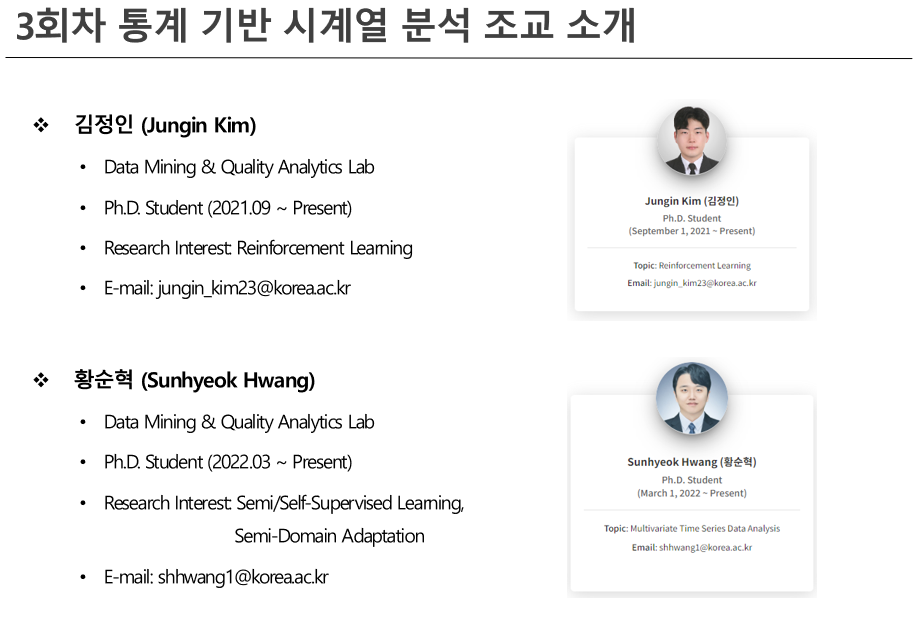

In [6]:
Image('image/img2.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/img2.PNG') # colab 사용시

## 1. Correlation Plot
- 변수 사이의 관계를 -1과 1 사이의 값으로 표현

In [7]:
# 패키지 호출하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 데이터 읽어오기
example_data = pd.read_csv('./dataset/example-correlation.csv')
example_data

# 코랩과 깃허브 연동하시는 분들 참고
# example_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/example-correlation.csv')

,x1,x2
0,2,4
1,3,7
2,5,6
3,6,5
4,7,9
5,9,12


In [9]:
# 판다스로 읽은 데이터 객체의 경우 corr 함수를 통해 쉽게 상관계수를 구할 수 있음
exam_corr = example_data.corr()
exam_corr

,x1,x2
x1,1.000000,0.811589
x2,0.811589,1.000000


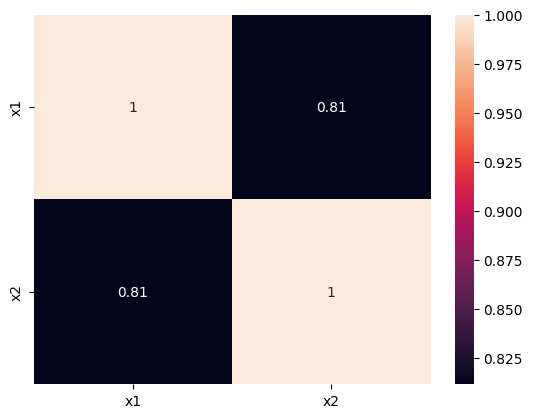

In [10]:
# 변수간 상관계수를 히트맵 형태로 시각화
sns.heatmap(exam_corr, annot=True) # annotation: 값을 표기함
plt.show()

## 2. Real-World Dataset 기반 Correlation 확인

### Variables in Heart Failure Prediction data
- age: age
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: evel of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)

In [11]:
heart_data = pd.read_csv('./dataset/heart_failure_clinical_records_dataset.csv')
heart_data.head(5)

# 코랩과 깃허브 연동하시는 분들 참고
# heart_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/heart_failure_clinical_records_dataset.csv')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


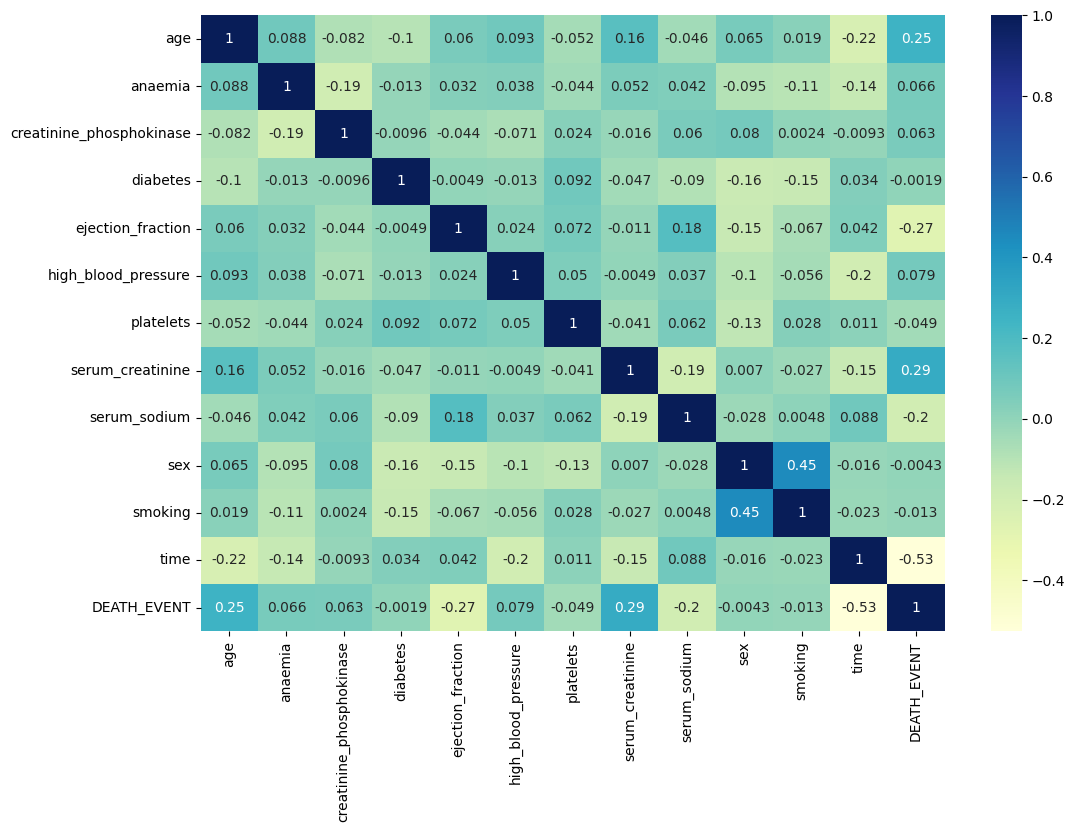

In [12]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(heart_data.corr(), annot=True, cmap='YlGnBu') # corr matrix 구하고 heatmap 함수로 시각화
plt.show()

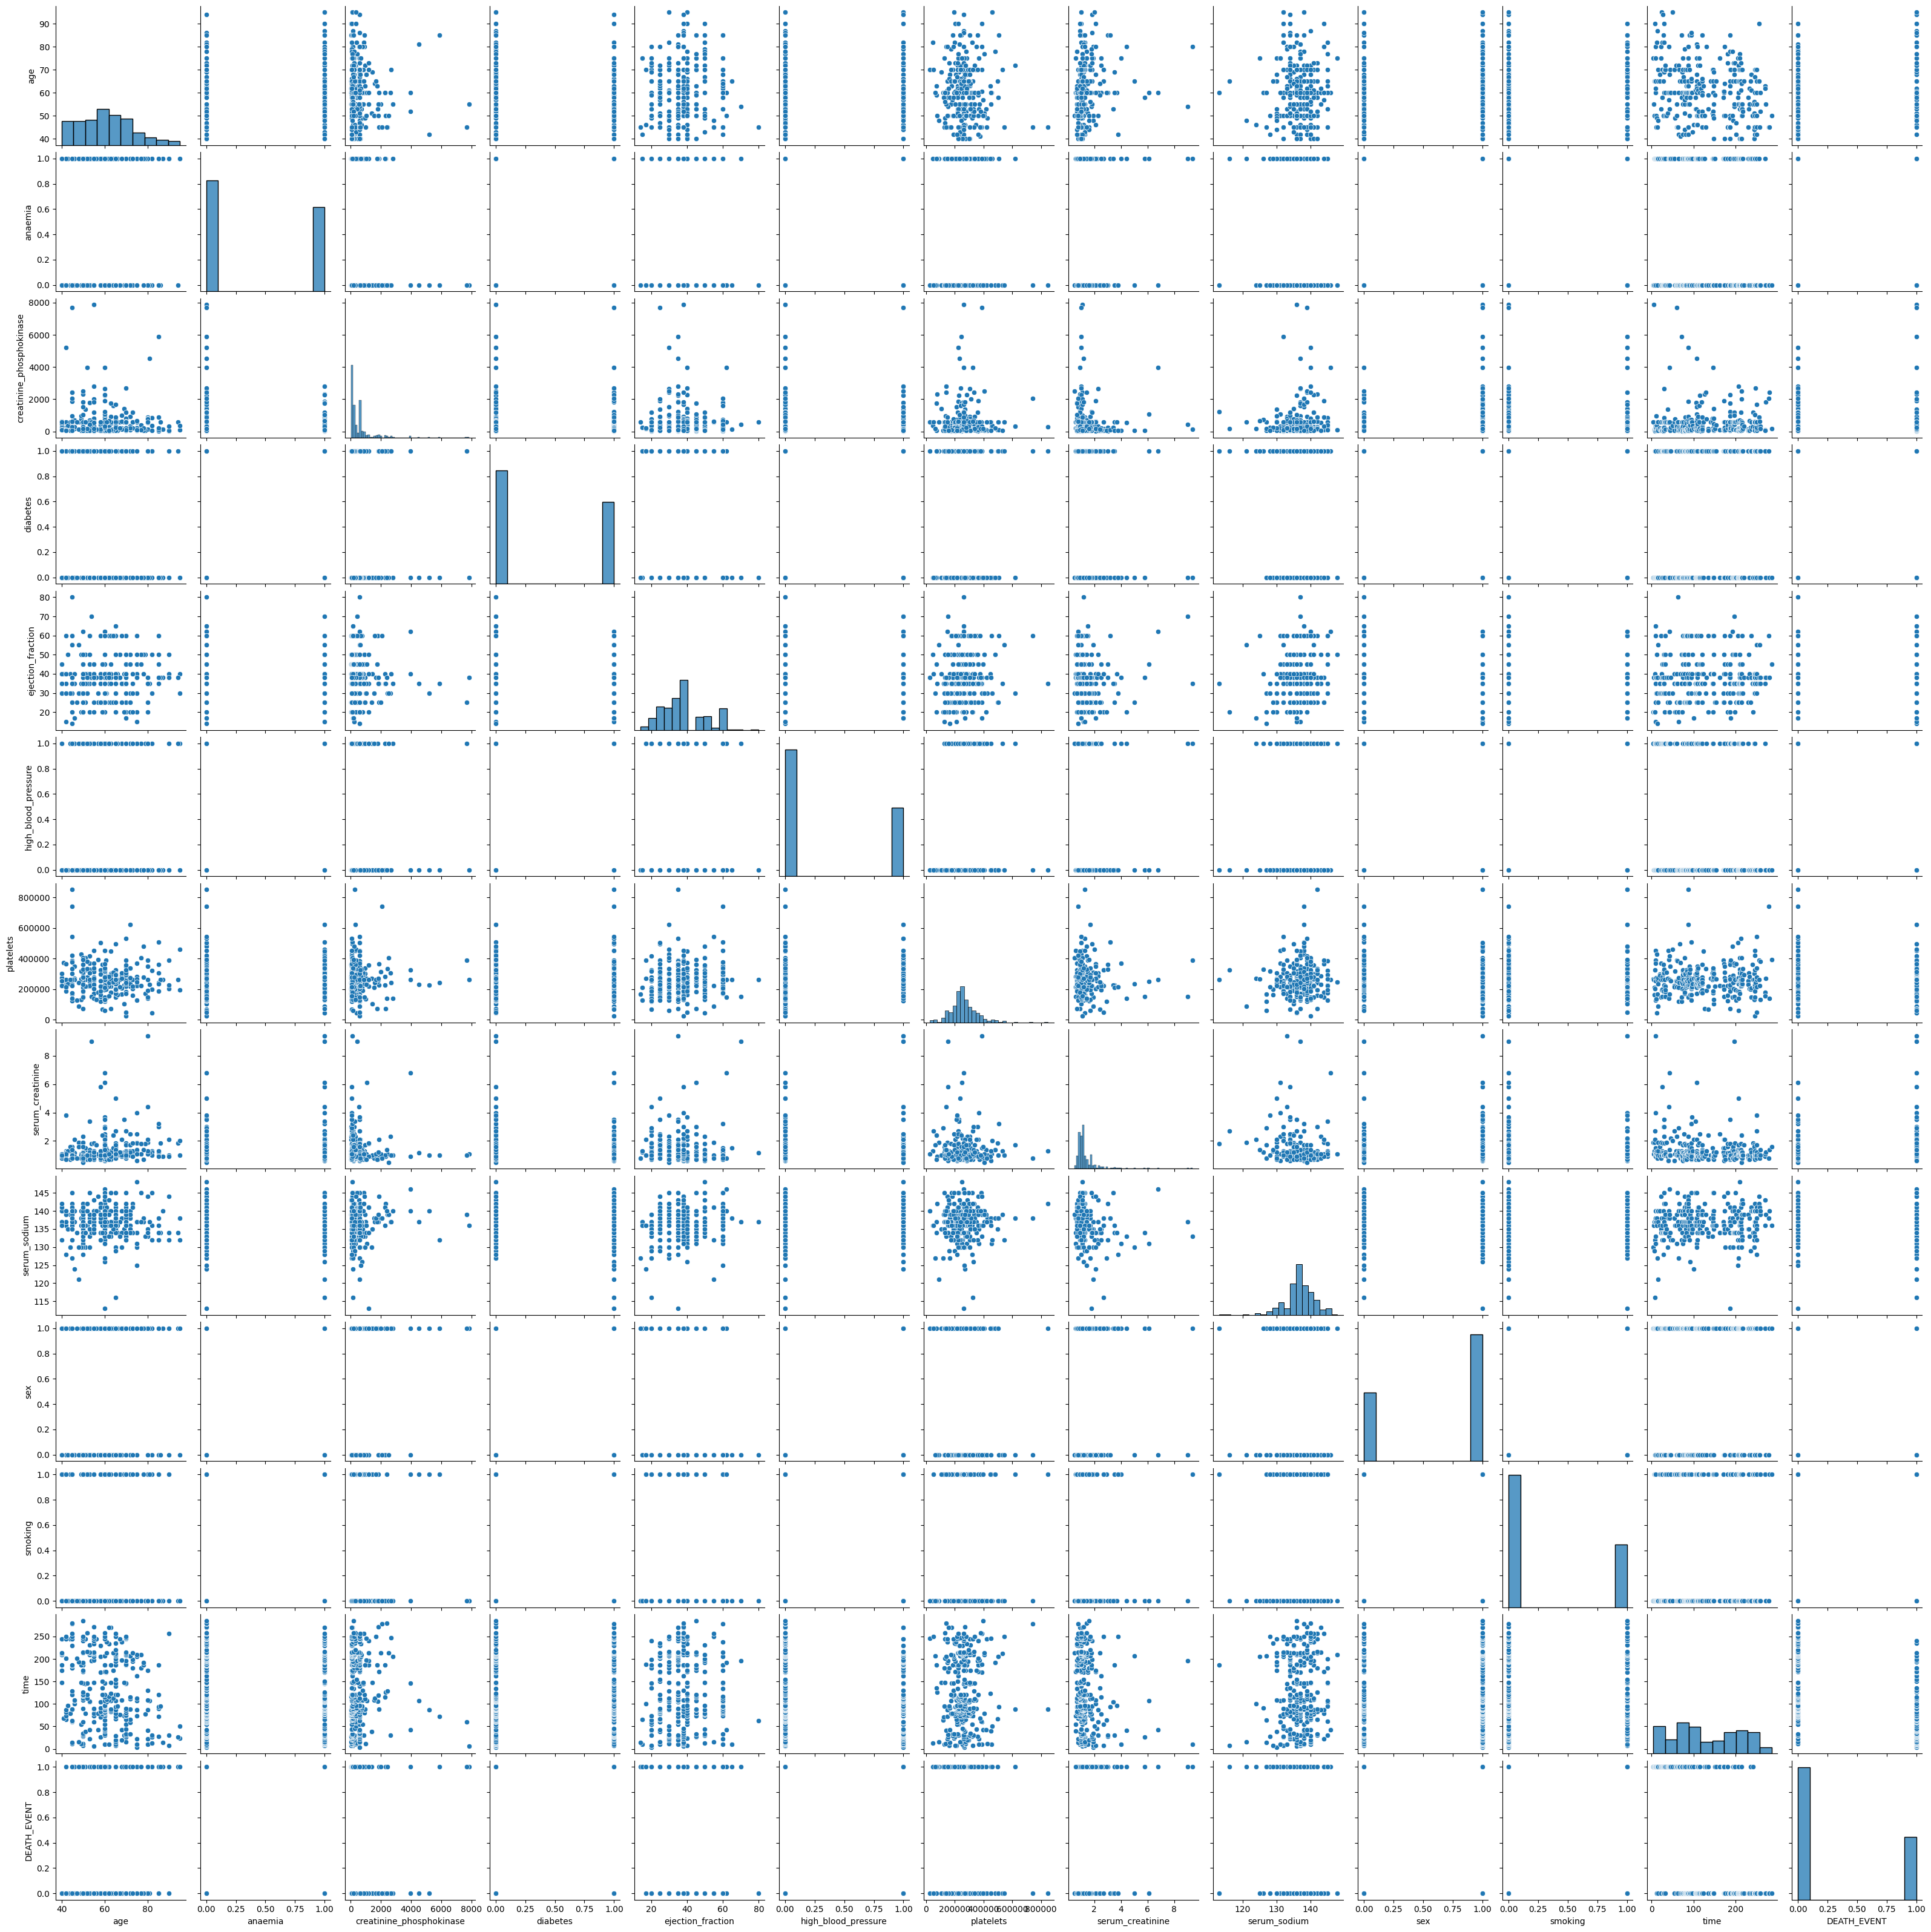

In [13]:
plt.rcParams['figure.figsize'] = (12,8)
sns.pairplot(heart_data) # 변수간(pariwise) 관계성을 파악하는데 유용한 함수
plt.show()

## 3. Auto Correlation 확인
- 시계열 데이터에서 현재의 값과 과거의 값들 사이의 관계를 나타내는 통계적 지표

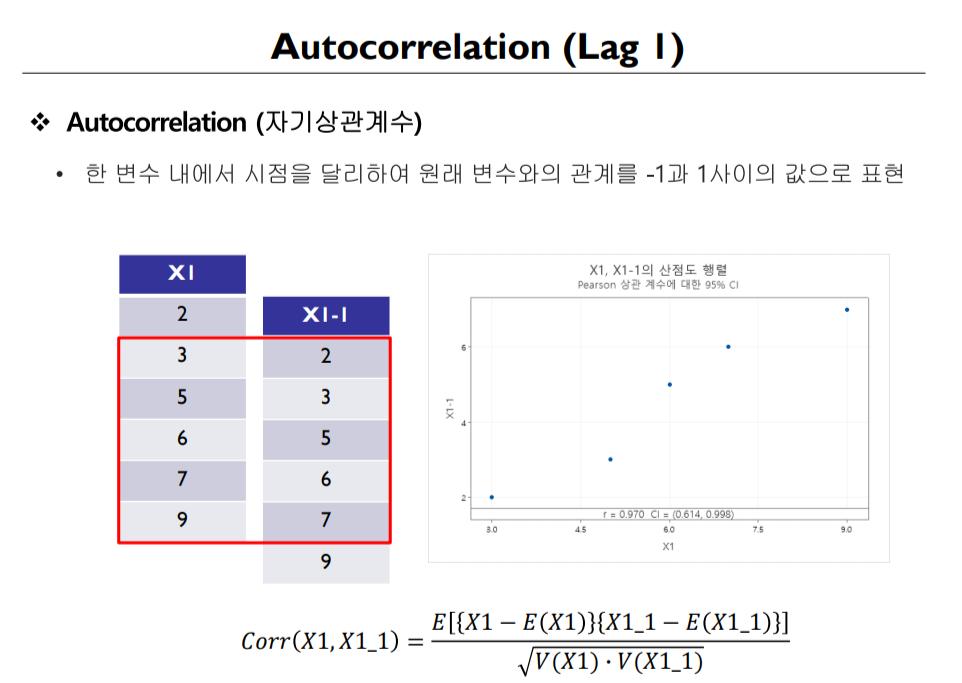

In [14]:
Image("./image/2-1.PNG")
# Image('/content/2024_LGE_TimeSeries/image/2-1.PNG') # colab

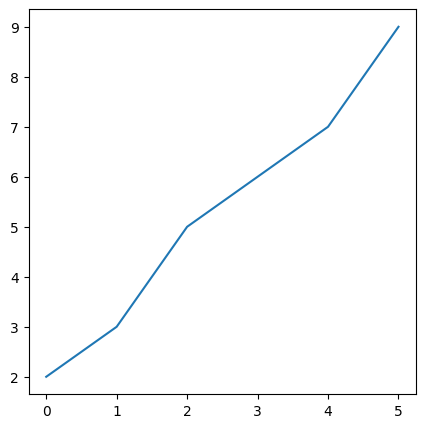

In [15]:
## 먼저 시각화를 통해 자기상관성이 있는지 확인해보기

time_series_data = example_data['x1']
plt.figure(figsize=(5,5))
plt.plot(time_series_data)
plt.show()

### Insights from the plot
1. 시간의 흐름에 따라 값이 증가하는 선형성을 가짐
2. 양의 자기상관계수를 가질 것으로 기대 (과거의 값이 높을 수록 현재의 값도 높을 가능성이 크다는 것을 의미)

In [16]:
# 자기상관계수를 구하기 위해 시계열 데이터를 1칸 앞으로 이동
example_data['x1_1'] = example_data['x1'].shift(1)

In [17]:
example_data.head(5)

,x1,x2,x1_1
0,2,4,NaN
1,3,7,2.0
2,5,6,3.0
3,6,5,5.0
4,7,9,6.0


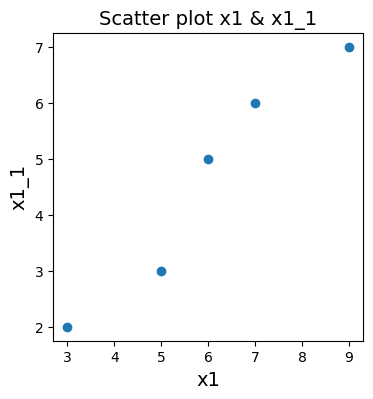

In [18]:
# 1칸 앞으로 이동된 시계열 데이터와, 원본 시계열 데이터 시각화
plt.figure(figsize=(4,4))
plt.title('Scatter plot x1 & x1_1', fontsize=14)
plt.scatter(example_data['x1'], example_data['x1_1'])
plt.xlabel('x1', fontsize=14)
plt.ylabel('x1_1', fontsize=14)
plt.show()

In [19]:
from scipy import stats
stats.pearsonr(example_data['x1'].iloc[1:], example_data['x1_1'].iloc[1:])[0]

0.9704949588309459

### Insights from the plot
시각화를 통해 양의 자기 상관관계를 가짐을 확인

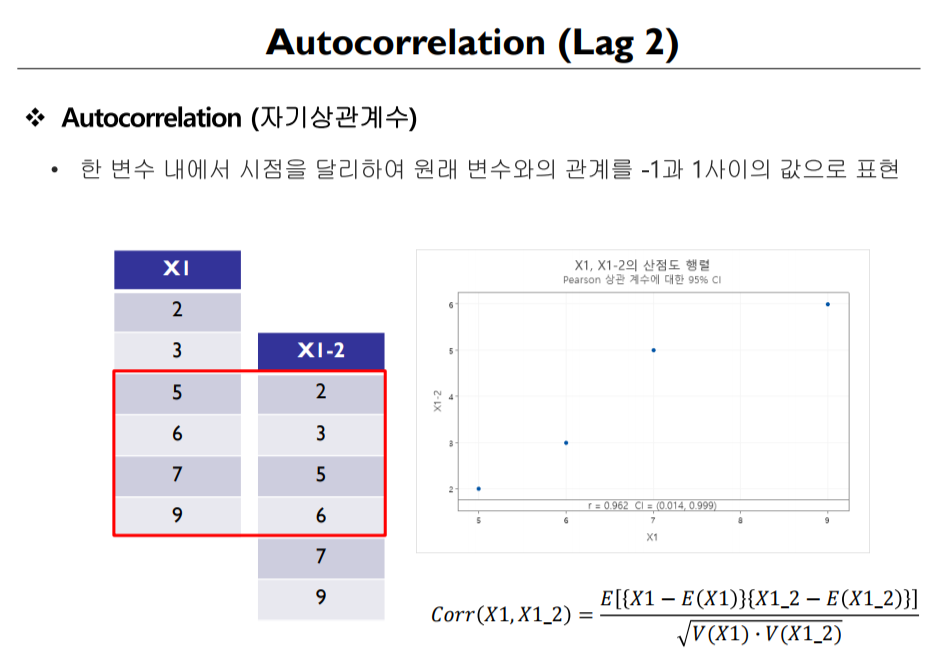

In [20]:
Image("./image/2-2.PNG")
# Image('/content/2024_LGE_TimeSeries/image/2-2.PNG') # colab

In [21]:
# lag=2
example_data['x1_2'] = example_data['x1'].shift(2)
example_data.head(5)

,x1,x2,x1_1,x1_2
0,2,4,NaN,NaN
1,3,7,2.0,NaN
2,5,6,3.0,2.0
3,6,5,5.0,3.0
4,7,9,6.0,5.0


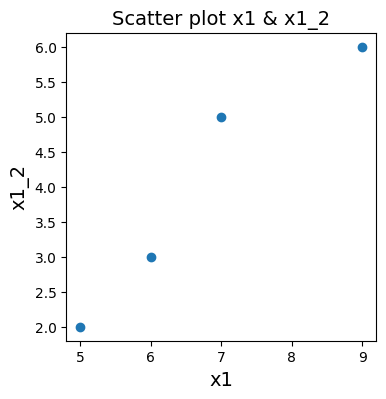

In [22]:
# 2칸 앞으로 이동된 시계열 데이터와, 원본 시계열 데이터 시각화
plt.figure(figsize=(4,4))
plt.title('Scatter plot x1 & x1_2', fontsize=14)
plt.scatter(example_data['x1'], example_data['x1_2'])
plt.xlabel('x1', fontsize=14)
plt.ylabel('x1_2', fontsize=14)
plt.show()

In [23]:
from scipy import stats
stats.pearsonr(example_data['x1'].iloc[2:], example_data['x1_2'].iloc[2:])[0]

0.9621404708847279

양의 자기상관관계를 가짐을 확인

## 4. Dubin-Waston Test (회귀분석에서 잔차의 자기상관을 감지하기 위한 통계적 검정)
- 회귀 모델은 잔차가 서로 독립적이라는 가정을 둠 (자기상관성이 없고 패턴이 없어야 함)
- 선형 회귀 모델에서 최소제곱추정량(OLS)은 잔차가 독립적일 때 최적의 모델링이 가능
- 0부터 4까지의 값을 가짐
    - 2는 자기상관성이 없음을 나타냄
    - 0에 가까우면 양의 자기상관성이 있음을 나타냄
    - 4에 가까우면 음의 자기상관성이 있음을 나타냄

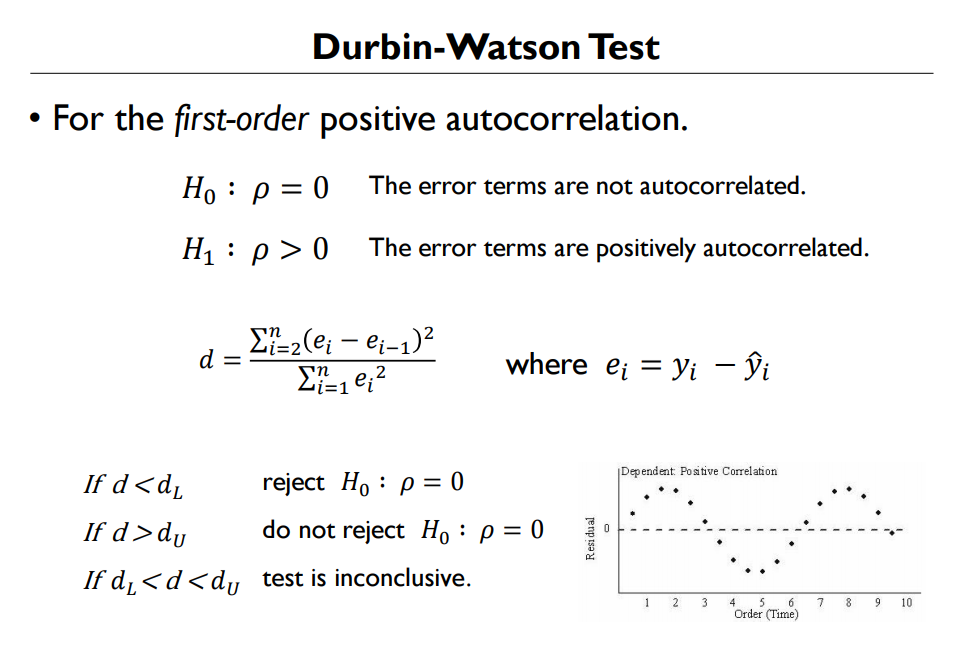

In [24]:
Image("./image/2-3.PNG")
# Image('/content/2024_LGE_TimeSeries/image/2-3.PNG') # colab

### 1. statsmodel 패키지를 이용한 더빈 왓슨 검정값 구하기

In [25]:
from statsmodels.formula.api import ols
import seaborn as sns
linear_data = pd.read_csv('./dataset/linear-trend-data.csv')
linear_model = ols('Sales ~ Time', data=linear_data).fit()
linear_model.summary()

# 코랩과 깃허브 연동하시는 분들 참고
# linear_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/linear-trend-data.csv')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     74.75
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.59e-08
Time:                        12:29:16   Log-Likelihood:                -115.94
No. Observations:                  24   AIC:                             235.9
Df Residuals:                      22   BIC:                             238.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.0290     13.344     14.840      0.000     170.354     225.704
Time           8.0743      0.934      8.646      0.000       6.138      10.011
==============================================================================
Omnibus:                        2.625   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.244
Skew:                           0.491   Prob(JB):                        0.537
Kurtosis:                       3.528   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. 더빈 왓슨 검정값 직접 구하기

In [26]:
# 더빗 왓슨 통계값 구하는 함수 만들기
def dubin_waston(resid, resid_1):
    return sum((resid[1:]-resid_1[1:])**2)/sum(resid**2)

In [27]:
# 선형 모델의 잔차를 구하기 위해 선형 모델 학습 및 테스팅
linear_predict = linear_model.predict(linear_data['Time'])
linear_data['residual'] = linear_data['Sales'] - linear_predict
# lag-1 잔차 구하기
linear_data['residual_1'] = linear_data['residual'].shift(1)

dw_value = dubin_waston(linear_data['residual'], linear_data['residual_1'])
print(f'Dubin watson statistic is {dw_value:.3f}')

Dubin watson statistic is 1.682
